In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_squared_error as m_s_e
from sklearn.linear_model import LinearRegression
from sklearn.utils import shuffle

%matplotlib inline

In [2]:
data = pd.read_csv("AmesHousing.tsv", delimiter="\t")
data.head(10)

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


In [3]:
data.dtypes

Order               int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [4]:
def transform_features(df):
    return df

In [5]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [6]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include = ['integer', 'float'])
    numeric_test = test.select_dtypes(include = ['integer', 'float'])
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions = lr.predict(test[features])

    test_mse = m_s_e(test['SalePrice'],test_predictions)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse
    
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

57088.251612639091

In [7]:
data.shape[0]

2930

In [8]:
num_missing = data.isnull().sum()

In [9]:
num_missing

Order                0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       490
Lot Area             0
Street               0
Alley             2732
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        23
Mas Vnr Area        23
Exter Qual           0
Exter Cond           0
                  ... 
Bedroom AbvGr        0
Kitchen AbvGr        0
Kitchen Qual         0
TotRms AbvGrd        0
Functional           0
Fireplaces           0
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual

In [10]:
#Setting up filter so comment out for now
#filter series to drop anything missing more than 25%

In [11]:
#drop_missing = num_missing[(num_missing > len(data)/4)].sort_values()
#data = data.drop(drop_missing.index, axis = 1)

In [69]:
#data.isnull().sum()

In [70]:
#Numerical columns: For columns with missing values, fill in with mode
#note that there may be better ways of doing this
#num_missing = data.select_dtypes(include = ['float', 'int']).isnull().sum()
#fixable_columns have more than one, less than 25% missing:
#fixable_numeric = num_missing[(num_missing <
                               #len(data)/4) &
                              #(num_missing > 0)].sort_values()
#fixable_numeric


In [14]:
## Compute the most common value for each column in `fixable_numeric_missing_cols`.

In [71]:
#replacement_values = data[fixable_numeric.index].mode().to_dict(orient = 'records')[0]

In [72]:
#replacement_values

In [73]:
#replace with replacement_values. Following command shows an advantage of dictionaries

In [18]:
#data = data.fillna(replacement_values)

In [19]:
#Now only columns with missing values should be text

In [74]:
#data.isnull().sum().value_counts()

In [75]:
#data.dtypes.value_counts()

In [77]:
#num_missing_text = data.select_dtypes(include = ['object']).isnull().sum()

In [78]:
#num_missing_text

In [79]:
#num_missing_num = data.select_dtypes(include = ['int','float']).isnull().sum()

In [80]:
#num_missing_num

In [81]:
#for now, get rid of data with missing text values

In [82]:
## Series object: column name -> number of missing values
#text_mv_counts = data.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)

## Filter Series to columns containing *any* missing values
#drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]

#data = data.drop(drop_missing_cols_2.index, axis=1)

In [83]:
#data.isnull().sum()

In [84]:
#data.isnull().sum().value_counts()

In [85]:
#Working with full data set

In [86]:
#look at creating some columns that better capture relationships: eg year info

In [87]:
#years_sold = data['Yr Sold'] - data['Year Built']
#check for nonsensical values
#years_sold[years_sold < 0]

In [89]:
#years_since_remod = data['Yr Sold'] - data['Year Remod/Add']
#check for nonsensical values
#years_since_remod[years_since_remod < 0]

In [90]:
#new columns
#data['years_sold'] = years_sold
#data['years_since_remod'] = years_since_remod

#drop nonsensical:
#data = data.drop([1702,2180,2181], axis = 0)

#drop original columns
#data = data.drop(['Year Built', 'Year Remod/Add'], axis = 1)

In [91]:
#Drop features that arent going to be useful for ML like Parcel ID (PID)

In [92]:
#data = data.drop(["PID", "Order"], axis = 1)

In [39]:
#Drop columns that leak info about the final sale
#data = data.drop(["Mo Sold", "Sale Condition", "Sale Type", "Yr Sold"], axis = 1)

In [93]:
#Now can update transform features with previous changes

In [10]:
def transform_features(df):
    #drop columns with more than 25% missing values
    num_missing = df.isnull().sum()
    drop_missing = num_missing[(num_missing > len(df)/4)].sort_values()
    df = df.drop(drop_missing.index, axis=1)
    #Numerical columns: For columns with missing values, fill in with mode
    num_missing = df.select_dtypes(include = ['float', 'int']).isnull().sum()
    #fixable_columns have more than one, less than 25% missing:
    fixable_numeric = num_missing[(num_missing < len(df)/4) & (num_missing > 0)].sort_values()
    replacement_values = df[fixable_numeric.index].mode().to_dict(orient = 'records')[0]
    df = df.fillna(replacement_values)
    #For now, get rid of text columns with missing values
    ## Series object: column name -> number of missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    ## Filter Series to columns containing *any* missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    #look at creating some columns that better capture relationships: eg year info
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['years_sold'] = years_sold
    df['years_since_remod'] = years_since_remod
    #drop nonsensical rows, where year count is negative:
    df = df.drop([1702,2180,2181], axis = 0)
    #drop original columns
    #Drop features that arent going to be useful for ML like Parcel ID (PID)
    #Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", 
                  "Sale Condition", "Sale Type", "Yr Sold",
                 "PID", "Order", 'Year Remod/Add'], axis = 1)
    return df

In [11]:
def select_features(df):
    return df[['Gr Liv Area', 'SalePrice']]

In [12]:
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    numeric_train = train.select_dtypes(include = ['integer', 'float'])
    numeric_test = test.select_dtypes(include = ['integer', 'float'])
    features = numeric_train.columns.drop('SalePrice')
    
    lr = LinearRegression()
    lr.fit(train[features], train['SalePrice'])
    test_predictions = lr.predict(test[features])

    test_mse = m_s_e(test['SalePrice'],test_predictions)
    test_rmse = np.sqrt(test_mse)
    
    return test_rmse

In [13]:
transform_data = transform_features(data)
filtered_data = select_features(transform_data)
rmse = train_and_test(filtered_data)

rmse

55275.367312413073

In [14]:
numeric_data = transform_data.select_dtypes(include = ['integer', 'float'])
numeric_data

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,years_sold,years_since_remod
0,20,141.0,31770,6,5,1960,112.0,639.0,0.0,441.0,...,210,62,0,0,0,0,0,215000,50,50
1,20,80.0,11622,5,6,1961,0.0,468.0,144.0,270.0,...,140,0,0,0,120,0,0,105000,49,49
2,20,81.0,14267,6,6,1958,108.0,923.0,0.0,406.0,...,393,36,0,0,0,0,12500,172000,52,52
3,20,93.0,11160,7,5,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,0,0,0,244000,42,42
4,60,74.0,13830,5,5,1997,0.0,791.0,0.0,137.0,...,212,34,0,0,0,0,0,189900,13,12
5,60,78.0,9978,6,6,1998,20.0,602.0,0.0,324.0,...,360,36,0,0,0,0,0,195500,12,12
6,120,41.0,4920,8,5,2001,0.0,616.0,0.0,722.0,...,0,0,170,0,0,0,0,213500,9,9
7,120,43.0,5005,8,5,1992,0.0,263.0,0.0,1017.0,...,0,82,0,0,144,0,0,191500,18,18
8,120,39.0,5389,8,5,1995,0.0,1180.0,0.0,415.0,...,237,152,0,0,0,0,0,236500,15,14
9,60,60.0,7500,7,5,1999,0.0,0.0,0.0,994.0,...,140,60,0,0,0,0,0,189000,11,11


In [15]:
#visualising correlation coefficients
corr_coefs = numeric_data.corr()['SalePrice'].abs().sort_values()
corr_coefs

BsmtFin SF 2         0.006127
Misc Val             0.019273
3Ssn Porch           0.032268
Bsmt Half Bath       0.035875
Low Qual Fin SF      0.037629
Pool Area            0.068438
MS SubClass          0.085128
Overall Cond         0.101540
Screen Porch         0.112280
Kitchen AbvGr        0.119760
Enclosed Porch       0.128685
Bedroom AbvGr        0.143916
Bsmt Unf SF          0.182751
Lot Area             0.267520
2nd Flr SF           0.269601
Bsmt Full Bath       0.276258
Half Bath            0.284871
Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
Year Built           0.558490
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Are

In [16]:
#lets only keep if over 0.3 (arbitrary)

In [17]:
corr_coefs[corr_coefs > 0.3]

Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
Year Built           0.558490
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [18]:
#can also drop from dataframe if less than 0.3
transform_data = transform_data.drop(corr_coefs[corr_coefs < 0.3].index, axis = 1)

In [19]:
corr_above3 = corr_coefs[corr_coefs > 0.3]

In [20]:
corr_above3

Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
Year Built           0.558490
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [21]:
sorted_corr_above3 = corr_above3.abs().sort_values()
sorted_corr_above3

Open Porch SF        0.316262
Wood Deck SF         0.328183
Lot Frontage         0.333681
BsmtFin SF 1         0.439284
Garage Yr Blt        0.442216
Fireplaces           0.474831
TotRms AbvGrd        0.498574
Mas Vnr Area         0.506983
years_since_remod    0.534985
Full Bath            0.546118
Year Built           0.558490
years_sold           0.558979
1st Flr SF           0.635185
Garage Area          0.641425
Total Bsmt SF        0.644012
Garage Cars          0.648361
Gr Liv Area          0.717596
Overall Qual         0.801206
SalePrice            1.000000
Name: SalePrice, dtype: float64

In [22]:
corrmat = numeric_data[sorted_corr_above3.index].corr()

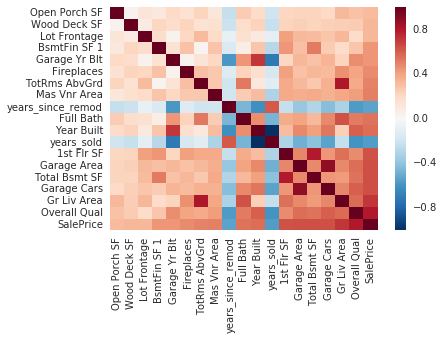

In [23]:
sns.heatmap(corrmat)

Strong correlations with Saleprice: OverallQual, Gr Liv Area

Reasonably Strong correlation with SalePrice: 1st Flr SF, Garage Area, Total Bsmt SF, Garage Cars

Negative Correlations with SalePrice: years sold and years since remod

Columns that are correlated with each other: Tot Rooms Above Ground/Gr Liv Area, Year Built/Garage Year Built, Bsmt Fin SF 1/Total Bsmt SF, Gr Liv Area/Full Bath, Total Bsmt SF/1st Floor SF, Garage Cars/Garage Area, Years Sold/Years Since Remod

Columns that are negatively correlated with each other: Years Sold/Garage Year Built, Years Since Remod/Garage Year Built, Overall Qual/Years Sold, Overall Qual/Years since remod, Garage Cars/Years Sold, Garage Cars/Years Since remod


In [24]:
# Think about which features in the df should be converted to categorical
#If listed as nominal, strong candidates
#List nominal

Nominal:

MS SubClass, MS Zoning, Street, Alley, Land Contour, Lot Config, Neighbourhood, Condition 1, Condition 2, Bldg Type, House Style, Roof Style, Roof Matl, Exterior 1, Exterior 2, Mas Vnr Type, Foundation, Heating, Central Air, Garage Type, Misc Feature, Sale Type, Sale Condition

No categories with 100s of possible values

In [25]:
#Next check columns with mostly same value
#create categorical list

In [26]:
categorical = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
               'Lot Config','Neighbourhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
               'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
               'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
               'Misc Feature', 'Sale Type', 'Sale Condition']

In [27]:
#Now look at columns that are numerical but whose numbers dont have any semantic meaning

In [28]:
num_no_meaning = ['Overall Qual', 'Overall Cond']
#not sure what to do with these

In [29]:
#Check if categoricals still in transform_data

In [31]:
transform_cat_cols = []
for col in categorical:
    if col in transform_data:
        transform_cat_cols.append(col)
        
#How many unique values are in each column?
unique_counts = transform_data[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
#drop if more than 15 to avoid length of dataset blowing out
#In a more comprehensive example this would be done with a bit more care
drop_cat = unique_counts[unique_counts > 15].index
transform_data = transform_data.drop(drop_cat, axis = 1)

In [32]:
#now update select features

In [33]:
def transform_features(df):
    #drop columns with more than 25% missing values
    num_missing = df.isnull().sum()
    drop_missing = num_missing[(num_missing > len(df)/4)].sort_values()
    df = df.drop(drop_missing.index, axis=1)
    #Numerical columns: For columns with missing values, fill in with mode
    num_missing = df.select_dtypes(include = ['float', 'int']).isnull().sum()
    #fixable_columns have more than one, less than 25% missing:
    fixable_numeric = num_missing[(num_missing < len(df)/4) & (num_missing > 0)].sort_values()
    replacement_values = df[fixable_numeric.index].mode().to_dict(orient = 'records')[0]
    df = df.fillna(replacement_values)
    #For now, get rid of text columns with missing values
    ## Series object: column name -> number of missing values
    text_mv_counts = df.select_dtypes(include=['object']).isnull().sum().sort_values(ascending=False)
    ## Filter Series to columns containing *any* missing values
    drop_missing_cols_2 = text_mv_counts[text_mv_counts > 0]
    df = df.drop(drop_missing_cols_2.index, axis=1)
    #look at creating some columns that better capture relationships: eg year info
    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    df['years_sold'] = years_sold
    df['years_since_remod'] = years_since_remod
    #drop nonsensical rows, where year count is negative:
    df = df.drop([1702,2180,2181], axis = 0)
    #drop original columns
    #Drop features that arent going to be useful for ML like Parcel ID (PID)
    #Drop columns that leak info about the final sale
    df = df.drop(["Mo Sold", 
                  "Sale Condition", "Sale Type", "Yr Sold",
                 "PID", "Order", 'Year Remod/Add'], axis = 1)
    return df

def select_features(df, coef_threshold = 0.3, uniq_threshold = 15):
    numeric_data = df.select_dtypes(include = ['integer', 'float'])
    abs_corr_coefs = df.corr()['SalePrice'].abs().sort_values()
    df = df.drop(corr_coefs[abs_corr_coefs < coef_threshold].index, axis = 1)
    categorical = ['PID', 'MS SubClass', 'MS Zoning', 'Street', 'Alley', 'Land Contour', 
               'Lot Config','Neighbourhood', 'Condition 1', 'Condition 2', 'Bldg Type', 
               'House Style', 'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 
               'Mas Vnr Type', 'Foundation', 'Heating', 'Central Air', 'Garage Type', 
               'Misc Feature', 'Sale Type', 'Sale Condition']
    transform_cat_cols = []
    for col in categorical:
        if col in df:
            transform_cat_cols.append(col)
    #How many unique values are in each column?
    unique_counts = df[transform_cat_cols].apply(lambda col: len(col.value_counts())).sort_values()
    #drop if more than 15 to avoid length of dataset blowing out
    #In a more comprehensive example this would be done with a bit more care
    drop_cat = unique_counts[unique_counts > uniq_threshold].index
    df = df.drop(drop_cat, axis = 1)
    #now take care of categoricals
    text_cols = df.select_dtypes(include = ['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include = ['category']))], axis = 1)
    return df

In [36]:
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, KFold

def train_and_test(df, k=0):
    numeric_df = df.select_dtypes(include = ['integer', 'float'])
    features = numeric_df.columns.drop('SalePrice')
    lr = LinearRegression()
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
        lr.fit(train[features], train['SalePrice'])
        test_predictions = lr.predict(test[features])
        test_mse = m_s_e(test['SalePrice'],test_predictions)
        test_rmse = np.sqrt(test_mse)
        return test_rmse
    
    if k == 1:
        df = shuffle(df)
        fold_one = df[:1460]
        fold_two = df[1460:]
        lr.fit(fold_one[features], fold_one['SalePrice'])
        test_predictions_1 = lr.predict(fold_two[features])
        test_1_mse = m_s_e(fold_two['SalePrice'],test_predictions_1)
        test_1_rmse = np.sqrt(test_1_mse)
        
        lr.fit(fold_two[features], fold_two['SalePrice'])
        test_predictions_2 = lr.predict(fold_one[features])
        test_2_mse = m_s_e(fold_one['SalePrice'],test_predictions_2)
        test_2_rmse = np.sqrt(test_2_mse)
        average_rmse = (test_1_rmse+test_2_rmse) / 2
        return average_rmse
    
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse_values = []
        for train_index, test_index, in kf.split(df):
            train = df.iloc[train_index]
            test = df.iloc[test_index]
            lr.fit(train[features], train["SalePrice"])
            predictions = lr.predict(test[features])
            mse = m_s_e(test["SalePrice"], predictions)
            rmse = np.sqrt(mse)
            rmse_values.append(rmse)
        print(rmse_values)
        avg_rmse = np.mean(rmse_values)
        return avg_rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse
        

[23336.542500669479, 23674.590097757133, 24524.156487787259, 36183.727844387096]


26929.754232650244